In [138]:
import numpy as np
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import datasets, transforms

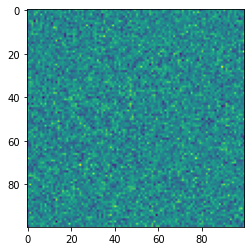

In [139]:
vv1 = np.random.randn(60000, 100)
plt.imshow(vv1[:100, :])

In [140]:
pca = PCA()
pca.fit(vv1)

PCA()

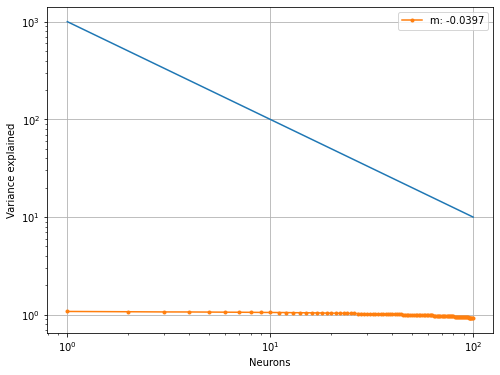

In [141]:
fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(len(pca.explained_variance_)) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")
plt.legend()
ax.grid()

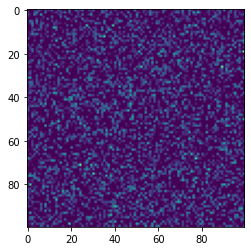

In [142]:
vv1 = torch.relu(torch.from_numpy(vv1)).detach().numpy()
plt.imshow(vv1[:100, :])

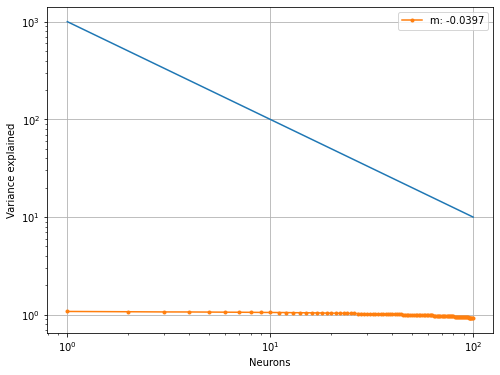

In [143]:
fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(len(pca.explained_variance_)) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")
plt.legend()
ax.grid()

In [144]:
batch_size=128
n_vis = 784
n_hid = 100
device = "cpu"

In [145]:
train_datasets = datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
    )
train_loader = torch.utils.data.DataLoader(
    dataset=train_datasets,
    batch_size=batch_size,
    shuffle=True,
)
test_datasets = datasets.MNIST(
    root="./data",
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor()])
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_datasets,
    batch_size=batch_size,
    shuffle=True
)

In [146]:
class Net(nn.Module):
    def __init__(self, n_in=784, n_out=100):
        super().__init__()
        self.fc1 = nn.Linear(n_in, n_out)
    def forward(self, x):
        return self.fc1(x)
    def visible_to_hidden(self, x):
        return self.forward(x)

In [147]:
model = Net()
model.train()

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
)

In [148]:
def neuron_fireing_vis():
    vv1 = np.zeros((len(train_datasets), n_hid))

    for idx, (x, y) in enumerate(train_loader):
        x = x.to(device)
        x = x.view(-1, n_vis)
        vv1[idx*batch_size:(idx+1)*batch_size, :] = model.visible_to_hidden(x).detach().cpu().numpy() # [batch_size, n_hid]
    return vv1

In [149]:
vv1 = neuron_fireing_vis()


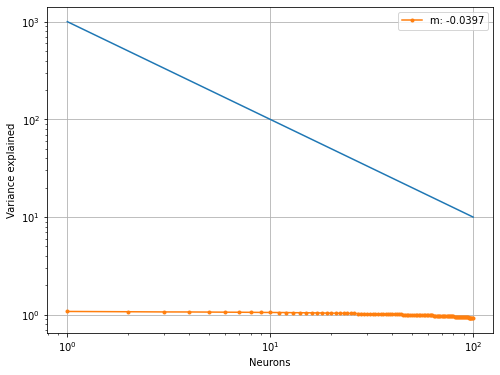

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(len(pca.explained_variance_)) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")
plt.legend()
ax.grid()

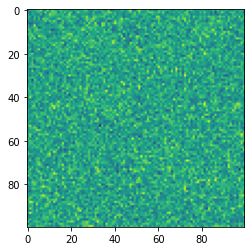

In [153]:
vv1 = np.zeros((len(train_datasets), n_hid))
vv1[:30000] = np.random.normal(-1, 1, (30000, 100)) 
vv1[30000:] = np.random.normal(-1, 1, (30000, 100)) 
vv1 = np.random.randn(60000, 100)
plt.imshow(vv1[:100, :])

In [154]:
pca = PCA()
pca.fit(vv1)

PCA()

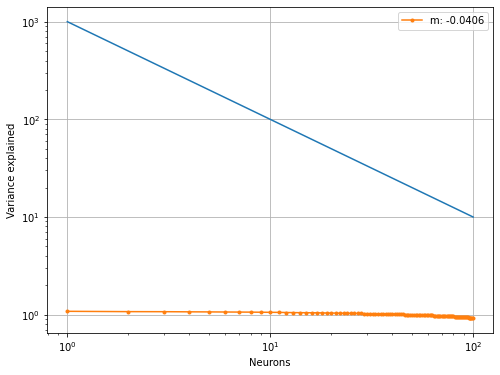

In [155]:
fig, ax = plt.subplots(figsize=(8, 6))
xx = np.arange(len(pca.explained_variance_)) + 1
log_xx = np.log(xx)
ax.plot(xx, 1000 * xx ** (-1.0))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.plot(xx, yy, '.-', label=f"m: {m:.3}")
plt.legend()
ax.grid()